In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
d_math = pd.read_csv('student-mat.csv')
d_por = pd.read_csv('student-por.csv')

In [16]:
d_math.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [17]:
d_math['Galc'] = d_math['Dalc'] + d_math['Walc']

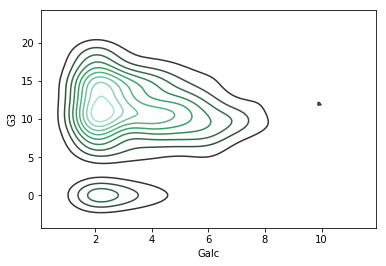

In [18]:
sns.kdeplot(d_math.Galc, d_math.G3)

## change color!!!!

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5]),
 <a list of 17 Text yticklabel objects>)

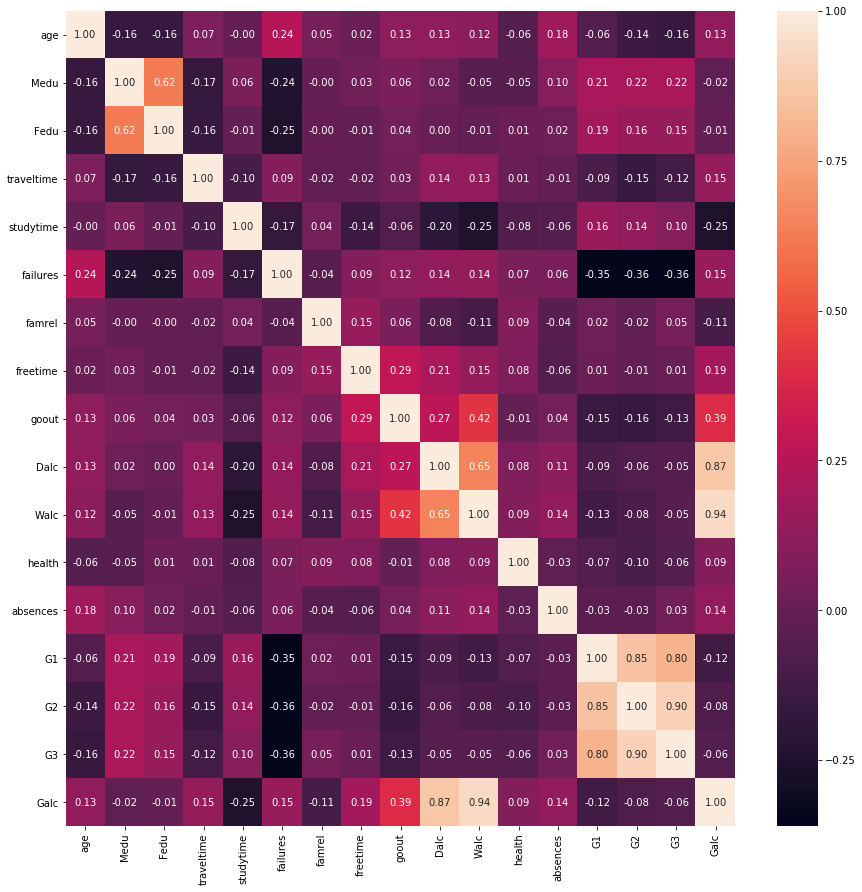

In [19]:
# Correlation
plt.figure(figsize=(15,15))
sns.heatmap(d_math.corr(),annot = True, fmt = ".2f",cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

We consdier the total number of students in both classes and try to predict what factors majorly affect the student's grades.

First we look at how much alcohol is consumed by the students. The x axis represents the number of times students consume
alcohol per week. So around 150 students consume alcohol atleast 2 times a week. Around 65 students consume alcohol atleast 3 
times a week and so on.

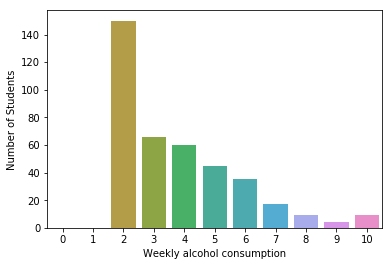

In [20]:
list = []
for i in range(11):
    list.append(len(d_math[d_math.Galc == i]))
ax = sns.barplot(x = [0,1,2,3,4,5,6,7,8,9,10], y = list)
plt.ylabel('Number of Students')
plt.xlabel('Weekly alcohol consumption')

Next, we consider the factor 'Health'. We all know how alcohol affects the health and in turn might affect the grades. 
We explored a new type of plot called the factor plots which displays how the health is affected by the weekly alcohol consumption.

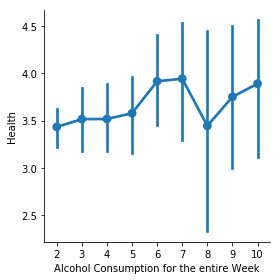

In [21]:
plot1 = sns.factorplot(x="Galc", y="health",data=d_math)
plot1.set(ylabel="Health", xlabel="Alcohol Consumption for the entire Week")

Now we can see how Alcohol consumption affects the Final grade. We have differenciated the male and the female for this graph.
The plot also shows a range for which each of the values can vary. This graph shows us how alcohol consumption between 3-5 times a week can increase the grade. But as the number of times er week increases, the grade decreases. This is especially true in the case of women.

For instance, students who drank but also volunteered or did some other kind of extracurricular activity tend to show fewer
negative consequences like skipping class, blowing off work, or failing assignments than classmates who spent time 
drinking more times a week but didn’t participate in other outside activities.

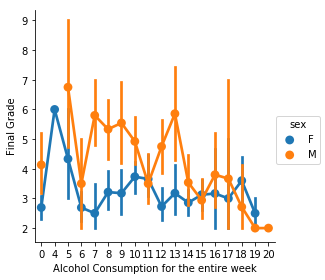

In [22]:
plot1 = sns.factorplot(x="G3", y="Galc", hue="sex", data=d_math)
plot1.set(ylabel="Final Grade", xlabel="Alcohol Consumption for the entire week")

In [23]:
def max_parenteducation(dataframe):
    return(max(dataframe['Medu'], dataframe['Fedu']))

d_math['maxparent_education'] = d_math.apply(lambda row: max_parenteducation(row), axis = 1)

def grade_average(dataframe):
    return((dataframe['G1']+dataframe['G2']+dataframe['G3'])/3 )
    
d_math['average_grade'] = d_math.apply(lambda row: grade_average(row), axis = 1)
d_por['average_grade'] = d_math.apply(lambda row: grade_average(row), axis = 1)

Now looking at a few other factors, Does parent education affect the grade? Of course it does!(Well atleast thats what the graph says). There seems to be a clear correlation between how well one of the parents studied to how well a child will perform!

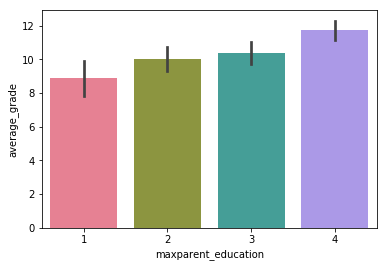

In [24]:
sns.barplot(x = "maxparent_education", y = "average_grade", data = d_math, palette="husl")

Now, looking into both classes separately, we look at how study time affects average grade. With experience, we must say that it does affect it quite a lot. This time we also used error bars to represent how far from the reported value, the true value is.

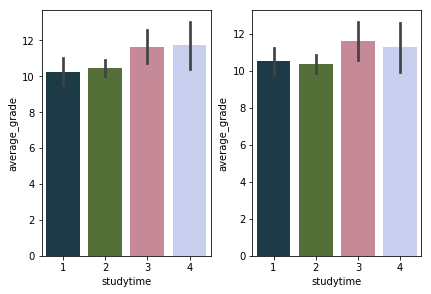

In [25]:
fig, axs = plt.subplots(ncols=2)
plt.tight_layout()
sns.barplot(x = "studytime", y = "average_grade", data = d_math, ax=axs[0],palette="cubehelix")
sns.barplot(x = "studytime", y = "average_grade", data = d_por, ax=axs[1],palette="cubehelix")

From the above graph, we can see that a moderate study time of 3 hours gives great grades!

We look into another factor, 'sex'. Does it matter? Yes it does! The graph below shows how the average grade is different for 
Males and Females. Males tend to have a higher average grade due to some factors we researched like concentration, dedication, thinking about one thing at a time unlike females, confidence etc. This graph is for the math class.

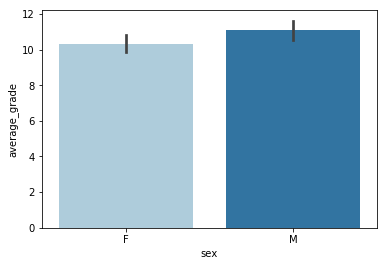

In [26]:
sns.barplot(x = "sex", y = "average_grade",data = d_math,palette="Paired")

The graph below is for the Portugese class. Males perform better here as well due to some factors i mentioned above. Although 
math involves more logic that portugese, males perform better because thy have better memory(proved from some studies and 
research) and concentration. 

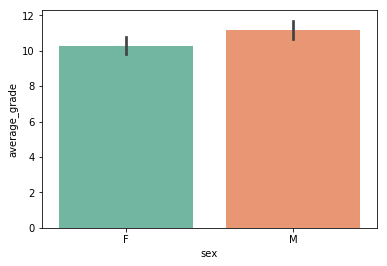

In [28]:
sns.barplot(x = "sex", y = "average_grade",data = d_por,palette="Set2")

In [29]:
def alchololic(dataframe):
    if(dataframe['Walc'] >= 3):
        return(True)
    else:
        return(False)

d_math['alchololic'] = d_math.apply(lambda row: alchololic(row), axis = 1)

d_por['alchololic'] = d_por.apply(lambda row: alchololic(row), axis = 1)

Coming back to Alcohol consuption which is our major issue for this dataset, We have a graph that represents the average grade 
when student are consuming and not consuming alcohol.

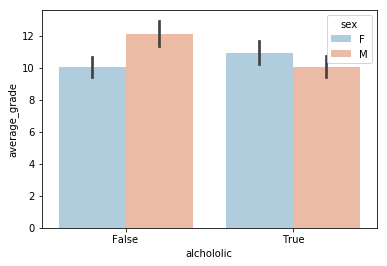

In [31]:
#Let's see the relationship between the alcoholism and average grade. 
sns.barplot(x = "alchololic", y = "average_grade", hue = "sex", data = d_math, palette="RdBu_r")

The above graph shows that when femlaes consume alcohol, their grade increases. However, for men, its the opposite. This might be because it helps the females to relax and hence perform better. There might be several other reasons as to how the brain reacts to alcohol consumption for females and so on. The above graoh is for the math class only. This class involves more logic than memorization. Alcohol might trigger female brains to be more active.

There seems to be a similar pattern for the portugese class. If females take alcohol then their grades seem to improve while it's reverse with males. Again it might be the alcohol trigerring something in the female brain that improves memory.

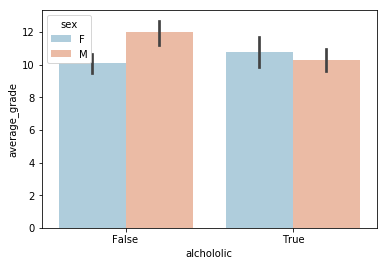

In [32]:
sns.barplot(x = "alchololic", y = "average_grade", hue = "sex", data = d_por,palette="RdBu_r")

The subplots below represent the failures do to alcohol consumption for both classes. The failures are especially high for males
as consumption of alcohol seems to affect them more that females. They start to relax too much and lose concentration. 

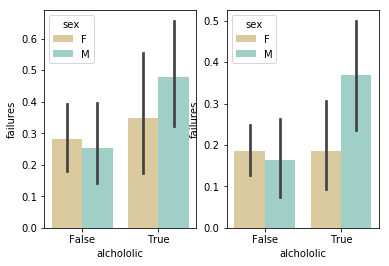

In [33]:
fig, axs = plt.subplots(ncols=2)
sns.barplot(x = "alchololic", y = "failures", data = d_math, hue="sex", ax = axs[0],palette="BrBG")
sns.barplot(x = "alchololic", y = "failures", data = d_por, hue = "sex", ax = axs[1],palette="BrBG")

From the above graph, considering classes that involve logic and memory, alcohol seem to affect males more than females. They have a higher negative impact for males compared to females. 